In [1]:
import pandas as pd
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
import shap

In [2]:
hd_train = pd.read_csv('train.csv')

hd_test = pd.read_csv('test.csv')   

In [3]:
hd_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   gender       70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


In [4]:
hd_train.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


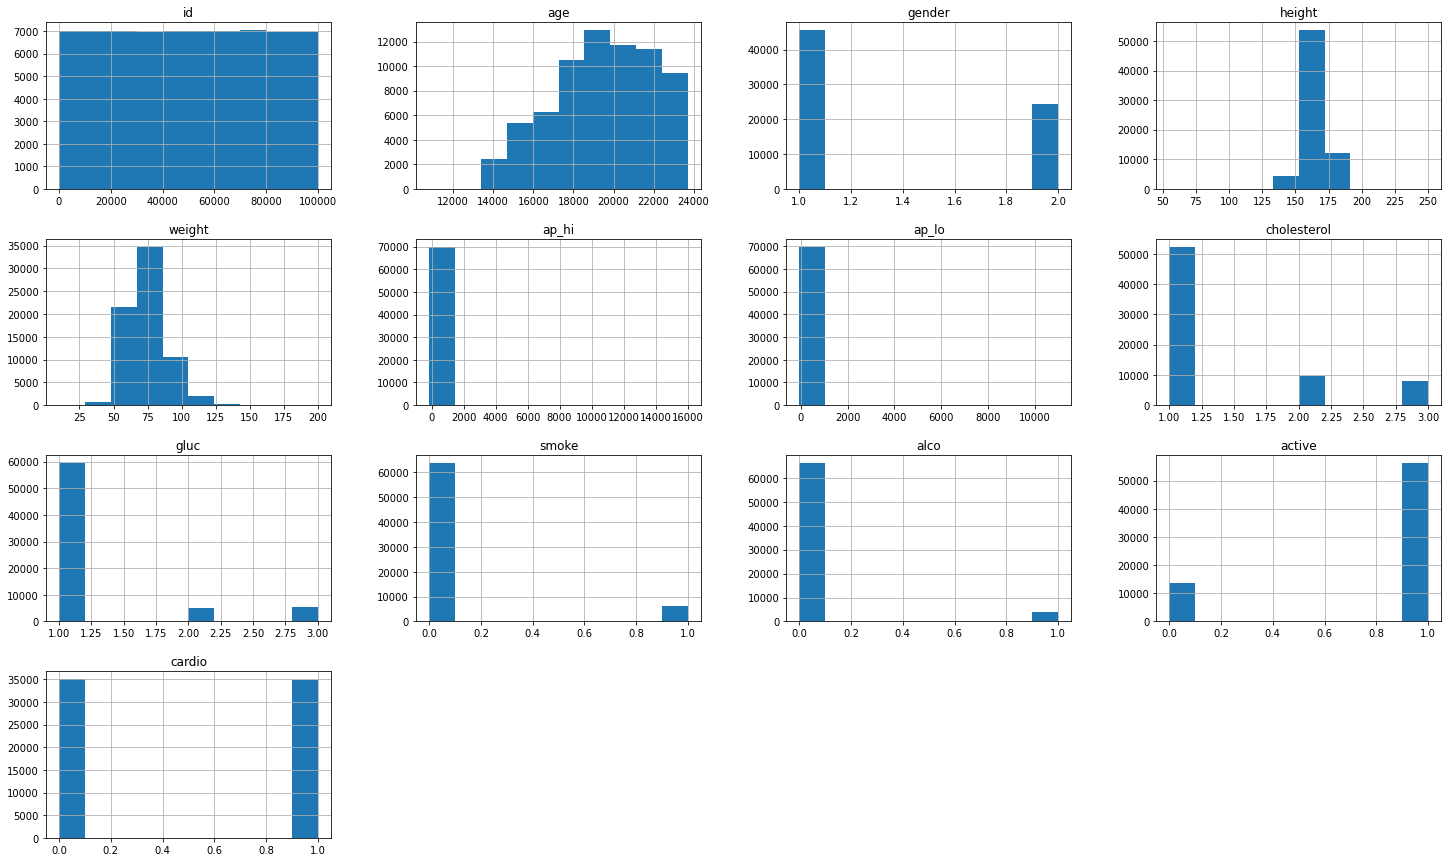

In [5]:
hd_train.hist(figsize = (25,15));

In [6]:
hd_train.describe()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,49972.419900,19468.865814,1.349571,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700
std,28851.302323,2467.251667,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,0.000000,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,25006.750000,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,50001.500000,19703.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,74889.250000,21327.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,99999.000000,23713.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


In [7]:
pd.DataFrame(round(hd_train.isna().mean()*100,)).style.background_gradient('coolwarm')

,0
id,0.000000
age,0.000000
gender,0.000000
height,0.000000
weight,0.000000
ap_hi,0.000000
ap_lo,0.000000
cholesterol,0.000000
gluc,0.000000
smoke,0.000000


<AxesSubplot:>

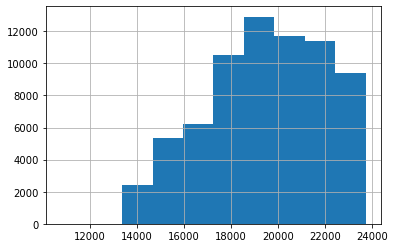

In [8]:
hd_train.age.hist()

<AxesSubplot:>

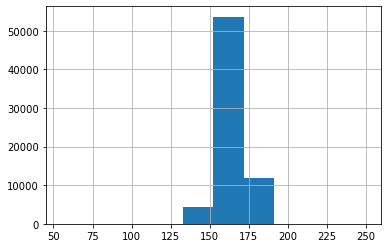

In [9]:
hd_train.height.hist()

In [10]:
hd_train.height.sort_values(ascending=True)

22723     55
66643     57
64115     59
29157     60
27603     64
        ... 
40090    198
8897     198
41901    200
21628    207
6486     250
Name: height, Length: 70000, dtype: int64

In [11]:
hd_train.weight.sort_values(ascending=True)

57858     10.0
33817     11.0
60188     21.0
29488     22.0
26806     23.0
         ...  
61362    180.0
36780    181.0
61285    183.0
50413    200.0
435      200.0
Name: weight, Length: 70000, dtype: float64

In [12]:
hd_train.height.quantile(0.01)

147.0

In [13]:
hd_train.weight.quantile(0.99)

117.0

In [14]:
hd_train.ap_hi.loc[hd_train.ap_hi > 500].count()

38

In [15]:
hd_train.ap_hi.loc[hd_train.ap_hi < 0].count()

7

In [16]:
hd_train.ap_lo.loc[hd_train.ap_hi < 0].count()

7

In [17]:
hd_train.loc[~((hd_train.height > hd_train.height.quantile(0.001)) & (hd_train.height < hd_train.height.quantile(0.999))), 'height'] = hd_train.height.median()

In [18]:
hd_train.height.describe()

count    70000.000000
mean       164.395014
std          7.784607
min        122.000000
25%        159.000000
50%        165.000000
75%        170.000000
max        189.000000
Name: height, dtype: float64

In [19]:
hd_train.loc[~((hd_train.weight > hd_train.weight.quantile(0.001)) & (hd_train.weight < hd_train.weight.quantile(0.999))), 'weight'] = hd_train.weight.median()

In [20]:
hd_train.weight.describe()

count    70000.000000
mean        74.158112
std         14.032638
min         41.000000
25%         65.000000
50%         72.000000
75%         82.000000
max        149.000000
Name: weight, dtype: float64

In [21]:
hd_train['ap_hi'] = abs(hd_train['ap_hi'])

In [22]:
hd_train['ap_lo'] = abs(hd_train['ap_lo'])

In [23]:
hd_train.describe()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,49972.419900,19468.865814,1.349571,164.395014,74.158112,128.841429,96.632414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700
std,28851.302323,2467.251667,0.476838,7.784607,14.032638,153.991223,188.471505,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,0.000000,10798.000000,1.000000,122.000000,41.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,25006.750000,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,50001.500000,19703.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,74889.250000,21327.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,99999.000000,23713.000000,2.000000,189.000000,149.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


In [24]:
hd_train.loc[~((hd_train.ap_hi > 30) & (hd_train.ap_hi < 300)), 'ap_hi'] = hd_train.ap_hi.median()

In [25]:
hd_train.loc[~((hd_train.ap_lo > 30) & (hd_train.ap_lo < 300)), 'ap_lo'] = hd_train.ap_lo.median()

In [26]:
hd_train.describe()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,49972.419900,19468.865814,1.349571,164.395014,74.158112,126.979086,81.364371,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700
std,28851.302323,2467.251667,0.476838,7.784607,14.032638,17.074223,9.623263,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,0.000000,10798.000000,1.000000,122.000000,41.000000,60.000000,40.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,25006.750000,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,50001.500000,19703.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,74889.250000,21327.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,99999.000000,23713.000000,2.000000,189.000000,149.000000,240.000000,190.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


In [27]:
hd_train.duplicated().sum()

0

In [28]:
x_train = hd_train.drop(['id', 'cardio'], axis=1)

In [29]:
x_train

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active
0,18393,2,168,62.0,110,80,1,1,0,0,1
1,20228,1,156,85.0,140,90,3,1,0,0,1
2,18857,1,165,64.0,130,70,3,1,0,0,0
3,17623,2,169,82.0,150,100,1,1,0,0,1
4,17474,1,156,56.0,100,60,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
69995,19240,2,168,76.0,120,80,1,1,1,0,1
69996,22601,1,158,126.0,140,90,2,2,0,0,1
69997,19066,2,183,105.0,180,90,3,1,0,1,0
69998,22431,1,163,72.0,135,80,1,2,0,0,0


In [30]:
y_train = hd_train['cardio']

In [31]:
y_train

0        0
1        1
2        1
3        1
4        0
        ..
69995    0
69996    1
69997    1
69998    1
69999    0
Name: cardio, Length: 70000, dtype: int64

In [32]:
clf_1 = DecisionTreeClassifier(random_state=12345, class_weight='balanced')
params_1 = {'criterion': ['gini', 'entropy'], 'max_depth': range(1, 13, 2), 'min_samples_leaf': range(2, 5, 1)}
search_1 = GridSearchCV(clf_1, params_1, cv=5, n_jobs=-1, scoring='roc_auc')
search_1.fit(x_train, y_train)
best_clf_1 = search_1.best_estimator_

In [33]:
best_clf_1

DecisionTreeClassifier(class_weight='balanced', criterion='entropy',
                       max_depth=7, min_samples_leaf=4, random_state=12345)

In [34]:
search_1.best_score_

0.7941198699831649

In [35]:
clf_2 = RandomForestClassifier(random_state=12345)
params_2 = {'criterion': ['gini', 'entropy'], 'n_estimators': range (10, 200, 10), 'max_depth': range(1, 13, 2), 'min_samples_leaf': range(2, 5, 1)}
search_2 = GridSearchCV(clf_2, params_2, cv=5, n_jobs=-1, scoring='roc_auc')
search_2.fit(x_train, y_train)
best_clf_2 = search_2.best_estimator_

In [36]:
best_clf_2

RandomForestClassifier(criterion='entropy', max_depth=11, min_samples_leaf=3,
                       n_estimators=190, random_state=12345)

In [37]:
search_2.best_score_

0.8023527708957193

In [38]:
x_train_sc = x_train

In [39]:
numeric = ['age', 'height', 'weight', 'ap_hi', 'ap_lo', 'cholesterol', 'gluc']
scaler = StandardScaler()
scaler.fit(x_train_sc[numeric])
x_train_sc[numeric] = scaler.transform(x_train_sc[numeric])

In [40]:
x_train_sc

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active
0,-0.436062,2,0.463095,-0.866423,-0.994435,-0.141779,-0.539322,-0.395720,0,0,1
1,0.307686,1,-1.078420,0.772625,0.762612,0.897377,2.400793,-0.395720,0,0,1
2,-0.247997,1,0.077716,-0.723897,0.176930,-1.180936,2.400793,-0.395720,0,0,0
3,-0.748152,2,0.591554,0.558836,1.348294,1.936533,-0.539322,-0.395720,0,0,1
4,-0.808543,1,-1.078420,-1.294001,-1.580117,-2.220092,-0.539322,-0.395720,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
69995,-0.092762,2,0.463095,0.131258,-0.408753,-0.141779,-0.539322,-0.395720,1,0,1
69996,1.269492,1,-0.821501,3.694406,0.762612,0.897377,0.930735,1.351719,0,0,1
69997,-0.163286,2,2.389988,2.197884,3.105341,0.897377,2.400793,-0.395720,0,1,0
69998,1.200589,1,-0.179203,-0.153793,0.469771,-0.141779,-0.539322,1.351719,0,0,0


In [41]:
clf_3 = LogisticRegression(random_state=12345)
params_3 = {'max_iter': range (100, 10000, 100)}
search_3 = GridSearchCV(clf_3, params_3, cv=5, n_jobs=-1, scoring='roc_auc')
search_3.fit(x_train_sc, y_train)
best_clf_3 = search_3.best_estimator_

In [42]:
best_clf_3

LogisticRegression(random_state=12345)

In [43]:
search_3.best_score_

0.7920217813973526

In [44]:
hd_test

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active
0,5,18888,1,154,85.0,130,80,1,1,0,0,1
1,6,19042,2,170,69.0,130,90,1,1,0,0,1
2,7,20432,1,160,70.0,120,75,1,1,0,0,0
3,10,18133,2,185,94.0,130,90,1,1,0,0,1
4,11,16093,2,170,76.0,120,80,1,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
29995,99984,21722,2,170,103.0,150,90,1,1,0,1,0
29996,99987,18309,1,172,78.0,110,70,1,1,0,0,1
29997,99989,21247,2,169,61.0,120,80,1,1,0,0,0
29998,99994,14509,2,175,80.0,120,80,2,1,0,0,0


In [45]:
hd_test.loc[~((hd_test.height > hd_test.height.quantile(0.001)) & (hd_test.height < hd_test.height.quantile(0.999))), 'height'] = hd_train.height.median()

In [46]:
hd_test.loc[~((hd_test.weight > hd_test.weight.quantile(0.001)) & (hd_test.weight < hd_test.weight.quantile(0.999))), 'weight'] = hd_train.weight.median()

In [47]:
hd_test['ap_hi'] = abs(hd_test['ap_hi'])

In [48]:
hd_test['ap_lo'] = abs(hd_test['ap_lo'])

In [49]:
hd_test.loc[~((hd_test.ap_hi > 30) & (hd_test.ap_hi < 300)), 'ap_hi'] = hd_train.ap_hi.median()

In [50]:
hd_test.loc[~((hd_test.ap_lo > 30) & (hd_test.ap_lo < 300)), 'ap_lo'] = hd_train.ap_lo.median()

In [51]:
hd_test.describe()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.00000,30000.000000,30000.000000
mean,50062.686900,19455.528400,1.353733,164.364967,74.081171,126.997700,81.410067,1.368033,1.222700,0.08860,0.055000,0.805733
std,28906.167148,2477.840922,0.478136,7.786171,13.975967,16.993675,9.542450,0.679166,0.566494,0.28417,0.227984,0.395642
min,5.000000,8865.000000,1.000000,122.000000,41.000000,60.000000,40.000000,1.000000,1.000000,0.00000,0.000000,0.000000
25%,24983.250000,17658.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.00000,0.000000,1.000000
50%,49995.500000,19694.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.00000,0.000000,1.000000
75%,75232.250000,21320.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.00000,0.000000,1.000000
max,99997.000000,23705.000000,2.000000,189.000000,146.000000,240.000000,190.000000,3.000000,3.000000,1.00000,1.000000,1.000000


In [52]:
x_test = hd_test.drop(['id'], axis=1)

In [53]:
probabilities = best_clf_2.predict_proba(x_test)
probabilities_one = probabilities[:, 1]

In [54]:
probabilities_one

array([0.49604428, 0.56405642, 0.42331717, ..., 0.44899613, 0.35841257,
       0.6630057 ])

In [55]:
probabilities

array([[0.50395572, 0.49604428],
       [0.43594358, 0.56405642],
       [0.57668283, 0.42331717],
       ...,
       [0.55100387, 0.44899613],
       [0.64158743, 0.35841257],
       [0.3369943 , 0.6630057 ]])

In [56]:
ss = pd.read_csv('sample_submission.csv')

In [57]:
ss

,id,cardio
0,5,0.0
1,6,0.0
2,7,0.0
3,10,0.0
4,11,0.0
...,...,...
29995,99984,0.0
29996,99987,0.0
29997,99989,0.0
29998,99994,0.0


In [58]:
hd_test_y = hd_test

In [59]:
hd_test_y['cardio'] = probabilities_one

In [60]:
hd_test_y

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,5,18888,1,154,85.0,130,80,1,1,0,0,1,0.496044
1,6,19042,2,170,69.0,130,90,1,1,0,0,1,0.564056
2,7,20432,1,160,70.0,120,75,1,1,0,0,0,0.423317
3,10,18133,2,185,94.0,130,90,1,1,0,0,1,0.480309
4,11,16093,2,170,76.0,120,80,1,1,0,0,1,0.236378
...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,99984,21722,2,170,103.0,150,90,1,1,0,1,0,0.861462
29996,99987,18309,1,172,78.0,110,70,1,1,0,0,1,0.233533
29997,99989,21247,2,169,61.0,120,80,1,1,0,0,0,0.448996
29998,99994,14509,2,175,80.0,120,80,2,1,0,0,0,0.358413


In [61]:
hd_test_y['cardio'].mean()

0.49905061786372307

In [62]:
hd_test_y_fin = hd_test_y[['id', 'cardio']]

In [63]:
hd_test_y_fin

,id,cardio
0,5,0.496044
1,6,0.564056
2,7,0.423317
3,10,0.480309
4,11,0.236378
...,...,...
29995,99984,0.861462
29996,99987,0.233533
29997,99989,0.448996
29998,99994,0.358413


In [64]:
hd_test_y_fin.to_csv('pred_kaggle_hd.csv', index=False)

In [65]:
pred_kaggle_hd = pd.read_csv('pred_kaggle_hd.csv')

In [66]:
pred_kaggle_hd

,id,cardio
0,5,0.496044
1,6,0.564056
2,7,0.423317
3,10,0.480309
4,11,0.236378
...,...,...
29995,99984,0.861462
29996,99987,0.233533
29997,99989,0.448996
29998,99994,0.358413


In [75]:
explainer = shap.Explainer(best_clf_2.predict, x_test)
shap_values = explainer(x_test)

Permutation explainer: 30001it [7:00:55,  1.19it/s]                                                                    


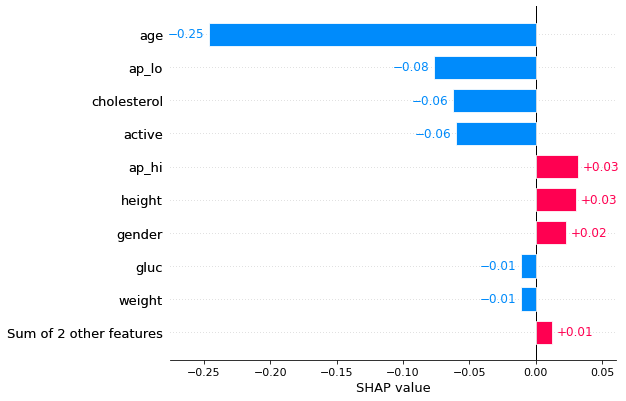

In [76]:
shap.plots.bar(shap_values[0])

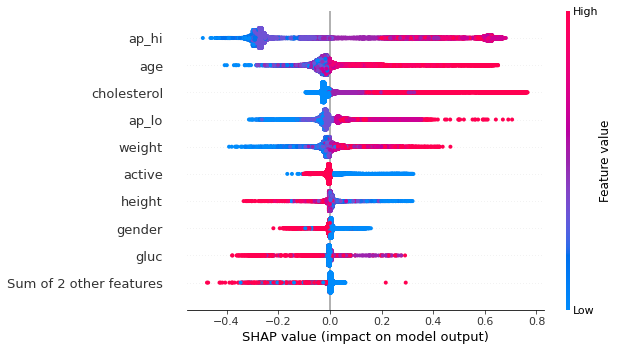

In [77]:
shap.plots.beeswarm(shap_values)

In [ ]:
from pickle import dump, load

In [ ]:
with open ('model.pcl', 'wb') as fid:
    dump (best_clf_2, fid)